In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
df.shape

(777, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
private        777 non-null object
apps           777 non-null int64
accept         777 non-null int64
enroll         777 non-null int64
top10perc      777 non-null int64
top25perc      777 non-null int64
f_undergrad    777 non-null int64
p_undergrad    777 non-null int64
outstate       777 non-null int64
room_board     777 non-null int64
books          777 non-null int64
personal       777 non-null int64
phd            777 non-null int64
terminal       777 non-null int64
s_f_ratio      777 non-null float64
perc_alumni    777 non-null int64
expend         777 non-null int64
grad_rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [9]:
df.isnull().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

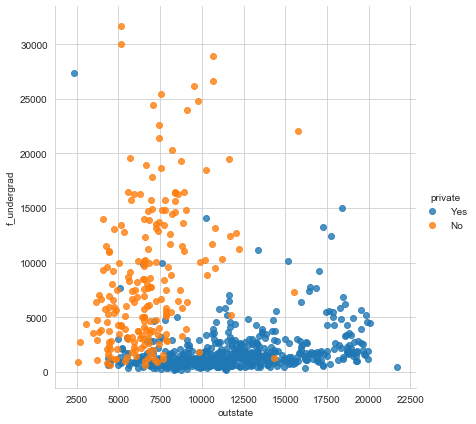

In [22]:
sns.set_style('whitegrid')
sns.lmplot(x = 'outstate', y = 'f_undergrad',data = df, hue = 'private',fit_reg = False,height = 6)

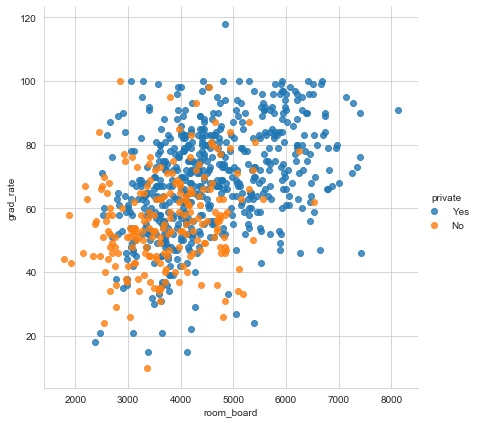

In [23]:
sns.lmplot(x = 'room_board', y = 'grad_rate',data = df, hue = 'private',fit_reg = False,height = 6)

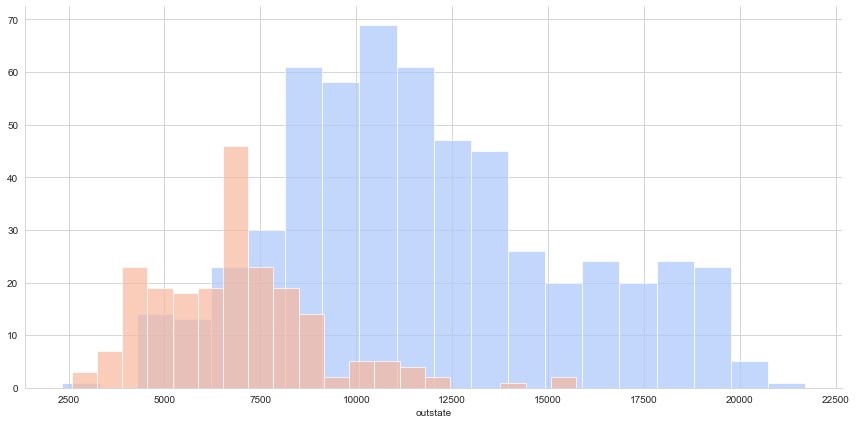

In [32]:
g = sns.FacetGrid(df,hue = 'private', palette = 'coolwarm', height = 6, aspect = 2)
g = g.map(plt.hist,'outstate', bins = 20, alpha = 0.7)

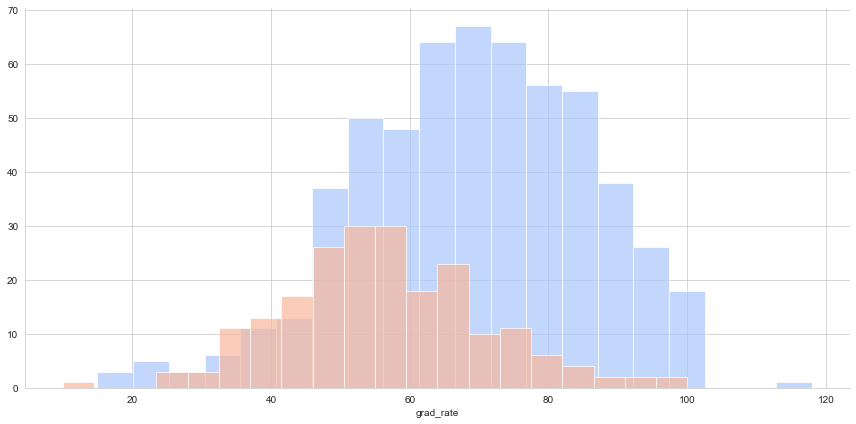

In [49]:
g = sns.FacetGrid(df,hue = 'private', palette = 'coolwarm', height = 6, aspect = 2)
g = g.map(plt.hist,'grad_rate', bins = 20, alpha = 0.7)

In [50]:
df[df['grad_rate']>100]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters=2)

In [54]:
kmeans.fit(df.drop('private',axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [56]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0

In [57]:
df['Cluster']  = df['private'].apply(converter)

In [58]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,Cluster
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
